In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file into a DataFrame
path = '../WDI_CSV_2024_09_25/WDICSV.csv'
df = pd.read_csv(path)

# Filter rows where the "Country" is "Kazakhstan"
kazakhstan_df = df[df['Country Name'] == 'Kazakhstan']

# Display the filtered DataFrame
kazakhstan_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
221712,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,93.2,93.4,93.40,93.4,93.4,93.5,93.3,93.1,NaN
221713,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.7,87.5,88.0,87.85,88.3,88.5,88.6,88.8,88.5,NaN
221714,Kazakhstan,KAZ,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.0,98.0,97.8,97.90,97.9,97.7,97.7,97.5,97.4,NaN
221715,Kazakhstan,KAZ,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,NaN
221716,Kazakhstan,KAZ,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,100.0,100.00,100.0,100.0,100.0,100.0,100.0,NaN


In [3]:
for line in kazakhstan_df["Indicator Name"]:
    print(line)

Access to clean fuels and technologies for cooking (% of population)
Access to clean fuels and technologies for cooking, rural (% of rural population)
Access to clean fuels and technologies for cooking, urban (% of urban population)
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)
Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)
Account ownership at

In [4]:
kdf = kazakhstan_df

cereal = kdf[kdf["Indicator Name"] == "Adjusted net national income (annual % growth)"]

cereal.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
221734,Kazakhstan,KAZ,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.177215,3.739795,-2.073172,3.487975,0.497171,6.618577,1.257616,-5.969837,NaN,NaN


In [5]:
X = []
Y = []

for year in range(1990, 2024):
    X.append(year)
    Y.append(cereal[f"{year}"])

print(X)
# print(Y)

Y = list(map(lambda y: float(y), Y))


[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


<Axes: >

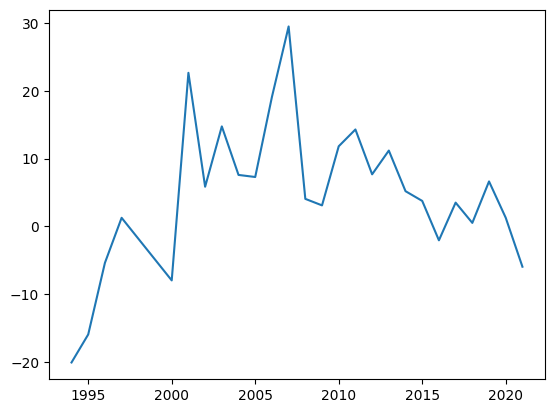

In [6]:
sns.lineplot(x=X, y=Y)

(0.0, 12.446000000000002)

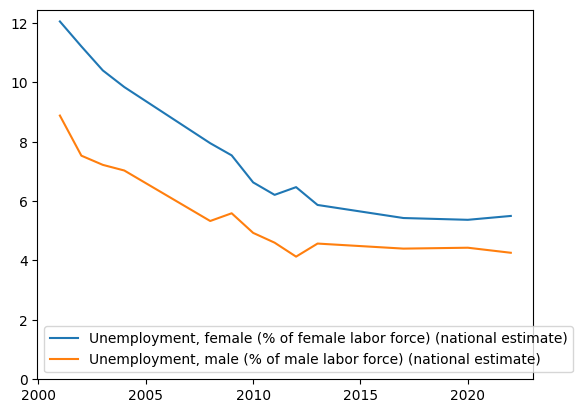

In [7]:
female_unemployment_rate = "Unemployment, female (% of female labor force) (national estimate)"
male_unemployment_rate = "Unemployment, male (% of male labor force) (national estimate)"

year_range = range(1980, 2024)

X = []
for year in year_range:
   X.append(year)

def getDataVector(label : str):
  Y = []
  for year in year_range:
      Y.append(kdf[kdf["Indicator Name"] == label][f"{year}"])
  return list(map(lambda y: float(y), Y))

sns.lineplot(x=X, y=getDataVector(female_unemployment_rate), label=female_unemployment_rate)
sns.lineplot(x=X, y=getDataVector(male_unemployment_rate), label=male_unemployment_rate)
plt.ylim(0, None)


(0.0, 4919.724081604344)

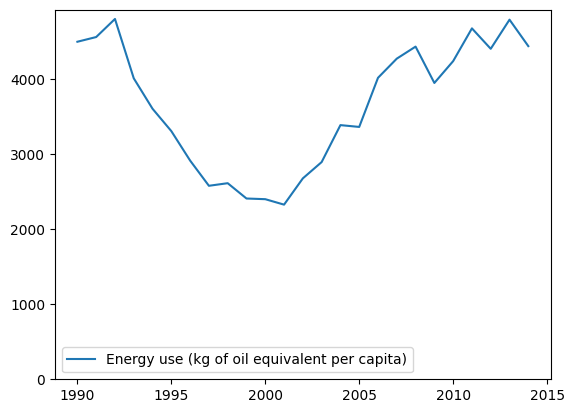

In [8]:
# Energy

energy_consumption = "Energy use (kg of oil equivalent per capita)"

sns.lineplot(x=X, y=getDataVector(energy_consumption), label=energy_consumption)
plt.ylim(0, None)

In [10]:
# Kazakhstan Electricity prices
# https://www.globalpetrolprices.com/Kazakhstan/electricity_prices/

kzt_per_kwh = 24.010

solar_panel_price_gbp = 42 # 35 without VAT
solar_panel_output_kw = 0.395
solar_panel_output_hours_year = 6 * 365

solar_panel_output_kwh_per_year = solar_panel_output_kw * solar_panel_output_hours_year
print(f"Solar output kWh/year {solar_panel_output_kwh_per_year:.2f}")

gbp_to_kzt = 634.09

solar_profit_per_panel_per_year_gbp = solar_panel_output_kwh_per_year * kzt_per_kwh / gbp_to_kzt
print(f"£{solar_profit_per_panel_per_year_gbp:.2f} GBP")

# Kazakh salary
# https://www.paylab.com/kz/salaries-in-country#:~:text=The%20salary%20range%20of%20employees,salaries%20can%20be%20even%20higher).

kazakh_median_salary = 299804

overhead_gbp = kazakh_median_salary / 12 / gbp_to_kzt

payback_period_years = (solar_panel_price_gbp + overhead_gbp) / solar_profit_per_panel_per_year_gbp
print(f"Payback period: {payback_period_years:.2f}")

target_salary = 40000
panels_needed_for_target_salary = target_salary / solar_profit_per_panel_per_year_gbp

print(f"Panels required for salary: {panels_needed_for_target_salary}")

print(f"Initial investment: £{panels_needed_for_target_salary * solar_panel_price_gbp}")

# Kazakh energy stats
# https://www.enerdata.net/estore/energy-market/kazakhstan/


Solar output kWh/year 865.05
£32.76 GBP
Payback period: 2.49
Panels required for salary: 1221.1739318971024
Initial investment: £51289.305139678305
